In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq fastbook

In [3]:
import fastai
import fastbook
from torchvision.models.resnet import resnet18
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.data import ImageDataLoaders
from fastai.vision.augment import Resize
from fastai.data.external import *
from fastai.vision.learner import vision_learner
from fastai.data import transforms
import PIL

In [4]:
fastbook.setup_book()

In [5]:
path = untar_data(fastai.data.external.URLs.PETS)

In [6]:
def is_cat(x):
    return x[0].isupper()

In [7]:
ims = transforms.get_image_files(path)

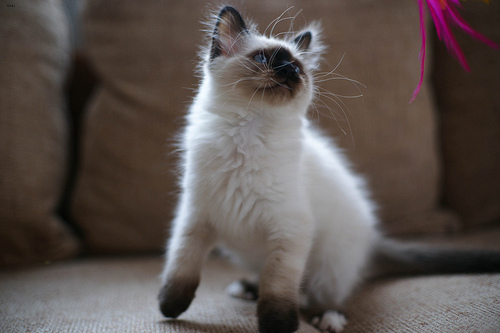

In [16]:
im1 = PIL.Image.open(ims[11])
im1

In [20]:
dls = ImageDataLoaders.from_name_func('.',
                      transforms.get_image_files(path),
                       valid_pct=0.2,
                       seed=42,
                       label_func=is_cat,
                        item_tfms=Resize(192))

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/Users/achu/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/achu/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/achu/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████| 44.7M/44.7M [00:00<00:00, 47.8MB/s]


In [34]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.410817,0.256605,0.121110,02:46


epoch,train_loss,valid_loss,error_rate,time
0,0.283648,0.209667,0.096076,02:53
1,0.207027,0.178459,0.077131,03:01
2,0.161821,0.171909,0.074425,03:05


In [56]:
learn.export('cat_classifier.pkl')